A look at LC secondary market ran by FolioLending. Please note that this is just a snapshot of the secondary market. Your results may vary. Data was downloaded on May 1, 2019.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

In [2]:
df = pd.read_csv('SecondaryMarketAllNotes.csv')

C:\Users\leero\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126461 entries, 0 to 126460
Data columns (total 21 columns):
LoanId                  126461 non-null int64
NoteId                  126461 non-null int64
OrderId                 126461 non-null int64
OutstandingPrincipal    126461 non-null float64
AccruedInterest         126461 non-null float64
Status                  126461 non-null object
AskPrice                126461 non-null float64
Markup/Discount         126461 non-null float64
YTM                     126461 non-null object
DaysSinceLastPayment    117227 non-null float64
CreditScoreTrend        126461 non-null object
FICO End Range          126461 non-null object
Date/Time Listed        126461 non-null object
NeverLate               126461 non-null bool
Loan Class              126461 non-null object
Loan Maturity           126461 non-null int64
Original Note Amount    126461 non-null float64
Interest Rate           126461 non-null float64
Remaining Payments      126461 non-null in

In [4]:
df['Loan Class']

0         A2
1         D4
2         A4
3         D5
4         D5
5         E2
6         D5
7         D5
8         D5
9         D3
10        D2
11        D3
12        C5
13        C5
14        C5
15        C5
16        C5
17        C5
18        A5
19        B4
20        C1
21        C1
22        C2
23        A5
24        A5
25        A5
26        A4
27        A4
28        B1
29        A5
          ..
126431    C5
126432    D5
126433    C5
126434    E3
126435    E2
126436    D1
126437    C2
126438    C1
126439    D5
126440    D2
126441    C1
126442    C1
126443    C1
126444    C1
126445    C1
126446    C3
126447    C4
126448    B5
126449    C2
126450    C1
126451    C5
126452    C4
126453    E1
126454    B5
126455    C1
126456    C1
126457    D2
126458    B5
126459    E3
126460    D1
Name: Loan Class, Length: 126461, dtype: object

In [5]:
def percentage(feature):
    """Prints out number of samples, percent of total that failed, t-stat, and p-value"""

    all_loans = df[feature].value_counts().sort_index()
    bad_loans = df.loc[df.Status == 0][feature].value_counts().sort_index() / all_loans * 100
    very_bad_loans = df.loc[df.Status ==-1][feature].value_counts().sort_index() / all_loans * 100
    
    n_percent = pd.concat([all_loans, bad_loans,very_bad_loans], axis=1)
    n_percent.columns = ['n_samples', 'percent 16-30 late','percent 30+ late']

    n_percent.reset_index(inplace=True)
    
#    n_percent.fillna(0, inplace=True)
    
    return(n_percent)

def object_graph(feature):
    """Makes a bar graph of a column complete with all it's features, each bar with show the its makeup as a percentage total
    and prints out the features with sample size and fail rate"""

    feature_interest = df[[feature, 'Status']].dropna()

    x = sorted(list(set(feature_interest[feature])))
    y = [np.sum(feature_interest.loc[feature_interest[feature] == i]
                ['Status'])/126461*100 for i in x]
    plt.bar(x, y)

    plt.title(feature.upper())
    plt.ylabel('%')
    plt.xlabel(feature)
    plt.xticks(rotation=90)

    plt.show()
    print(percentage(feature))

In [6]:
df['Status'] = df['Status'].apply(lambda status: 0 if '30' in status else -1 if '120' in status else 1)

In [7]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

def numeric_graph(feature):
    """Makes a graph of a numeric column by turn the data into a ECDF"""

    feature_interest = df[[feature, 'Status']].dropna()

    # good loans
    good_x, good_y = ecdf(
        feature_interest.loc[feature_interest.Status == 1][feature])
    plt.plot(good_x, good_y, marker='.', linestyle='none',
             color='green', label='Current')

    # population
    pop_x, pop_y = ecdf(feature_interest[feature])
    plt.plot(pop_x, pop_y, marker='.', linestyle='none',
             color='black', label='All loans')

    # bad loans
    bad_x, bad_y = ecdf(
        feature_interest.loc[feature_interest.Status == 0][feature])
    plt.plot(bad_x, bad_y, marker='.', linestyle='none',
             color='red', label='Late 16-30')
    
    very_bad_x, very_bad_y = ecdf(
        feature_interest.loc[feature_interest.Status == -1][feature])
    plt.plot(very_bad_x, very_bad_y, marker='.', linestyle='none',
             color='blue', label='Late 30+')
    
    plt.title(feature.upper())
    plt.axis([np.percentile(pop_x, 2.5), np.percentile(pop_x, 97.5), 0, 1])
    plt.xlabel('Amounts')
    plt.ylabel('% cumulative')
    plt.legend(loc='best')

    plt.show()

    df_description = pd.concat([feature_interest[feature].describe(),
                                feature_interest.loc[feature_interest.Status == 1][feature].describe(),
                                feature_interest.loc[feature_interest.Status == 0][feature].describe(),
                                feature_interest.loc[feature_interest.Status == -1][feature].describe()],
                                axis=1)
    df_description.columns = ['All loans', 'Current', 'Late 16-30', 'Late 30+']
    print(df_description)

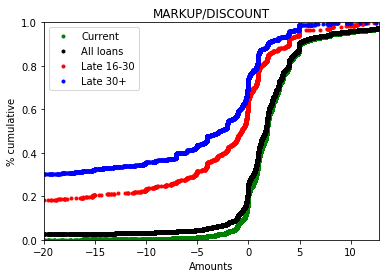

           All loans        Current   Late 16-30     Late 30+
count  126461.000000  115616.000000  1866.000000  8979.000000
mean        0.796134       2.300448    -7.154411   -16.921551
std         9.491068       3.708379    15.064838    26.236657
min       -92.000000     -52.910000   -69.600000   -92.000000
25%         0.000000       0.410000    -8.027500   -25.300000
50%         1.680000       1.810000    -0.660000    -2.720000
75%         3.310000       3.380000     0.940000     0.100000
max        39.610000      39.610000    20.190000    27.480000


In [8]:
numeric_graph('Markup/Discount')

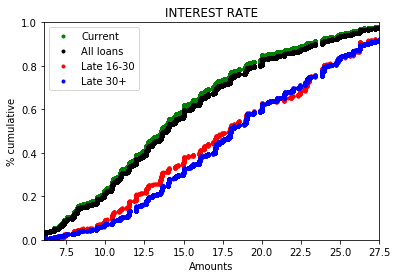

           All loans        Current   Late 16-30     Late 30+
count  126461.000000  115616.000000  1866.000000  8979.000000
mean       14.797601      14.443295    18.239979    18.644347
std         5.797342       5.636040     6.286235     6.104107
min         5.310000       5.310000     5.310000     5.310000
25%        10.470000      10.410000    12.790000    13.990000
50%        13.900000      13.580000    17.970000    18.060000
75%        18.060000      17.970000    22.990000    23.130000
max        30.990000      30.990000    30.990000    30.990000


In [9]:
numeric_graph('Interest Rate')

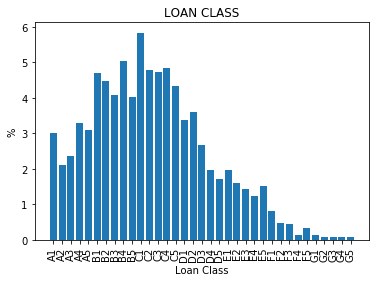

   index  n_samples  percent 16-30 late  percent 30+ late
0     A1       3904            0.102459          1.408811
1     A2       2821            0.141794          2.481390
2     A3       3092            0.452781          1.778784
3     A4       4306            0.789596          1.300511
4     A5       4072            0.810413          1.669941
5     B1       6441            0.512343          3.539823
6     B2       6003            0.599700          2.648676
7     B3       5544            1.605339          2.507215
8     B4       6808            0.705053          2.849589
9     B5       5882            1.343081          6.205372
10    C1       8283            1.436678          4.696366
11    C2       6937            1.196483          5.852674
12    C3       6792            0.853946          5.638987
13    C4       7038            1.136687          5.939187
14    C5       6373            1.192531          6.464773
15    D1       5453            1.723822          9.957821
16    D2      

In [10]:
object_graph('Loan Class')